In [96]:
import sys
sys.path.append("/home/jupyter/Code/virtual_visium/src")
from tiler_the_creator import *
from cnn_lib import parse_tile_name
from openslide import open_slide
from pathlib import Path
import numpy as np
import feather
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import torch
from PIL import Image
from torchvision.transforms import transforms

In [67]:
# read prediction
pred_df = pd.read_csv('/home/jupyter/model_out/model_0718/0718_GFAP_predictions-Copy1.csv')

In [68]:
pred_df.head()

,tile_name,label,prediction
0,s1512-brain1A-AAACAAGTATCTCCCA-1_1-256x256.jpeg,19.0,17.068
1,s1512-brain1A-AAACACCAATAACTGC-1_1-256x256.jpeg,14.0,21.555
2,s1512-brain1A-AAACAGCTTTCAGAAG-1_1-256x256.jpeg,39.0,39.259
3,s1512-brain1A-AAACAGGGTCTATATT-1_1-256x256.jpeg,17.0,24.339
4,s1512-brain1A-AAACAGTGTTCCTGGG-1_1-256x256.jpeg,13.0,13.547


In [69]:
SampleID = 's1512'
TissueID = 'brain1A'

In [75]:
barcodes=[]
labels = []
predictions = []
imagerows = []
imagecols = []
for i, row in pred_df.iterrows():
    tn_dic = parse_tile_name(row['tile_name'])
    sample_id = tn_dic['sample_id']
    tissue_id = tn_dic['tissue_id']
    barcode = tn_dic['barcode']
    if sample_id != SampleID or tissue_id != TissueID:
        continue
    
    # find barcode cor in tc
    entry = tc.loc[tc['barcode'] == barcode]
    
    #print(barcode)
    #print(entry)
    
    # link barcodes and index
    barcodes.append(barcode)
    labels.append(row['label'])
    predictions.append(row['prediction'])
    imagerows.append(entry['imagerow'].item())
    imagecols.append(entry['imagecol'].item())
    
d = {
    'barcode' : barcodes,
    'label' : labels,
    'prediction' : predictions,
    'imagerow' : imagerows,
    'imagecol' : imagecols
}

df = pd.DataFrame(data=d)

AAACAAGTATCTCCCA-1_1
                barcode  tissue  row  col  imagerow  imagecol
0  AAACAAGTATCTCCCA-1_1       1   50  102      9893     11642
AAACACCAATAACTGC-1_1
                barcode  tissue  row  col  imagerow  imagecol
1  AAACACCAATAACTGC-1_1       1   59   19     11462      3396
AAACAGCTTTCAGAAG-1_1
                barcode  tissue  row  col  imagerow  imagecol
2  AAACAGCTTTCAGAAG-1_1       1   43    9      8697      2398
AAACAGGGTCTATATT-1_1
                barcode  tissue  row  col  imagerow  imagecol
3  AAACAGGGTCTATATT-1_1       1   47   13      9388      2796
AAACAGTGTTCCTGGG-1_1
                barcode  tissue  row  col  imagerow  imagecol
4  AAACAGTGTTCCTGGG-1_1       1   73   43     13879      5785
AAACATTTCCCGGATT-1_1
                barcode  tissue  row  col  imagerow  imagecol
5  AAACATTTCCCGGATT-1_1       1   61   97     11796     11148
AAACCCGAACGAAATC-1_1
                barcode  tissue  row  col  imagerow  imagecol
6  AAACCCGAACGAAATC-1_1       1   45  115      

In [76]:
df.head()

,barcode,label,prediction,imagerow,imagecol
0,AAACAAGTATCTCCCA-1_1,19.0,17.068,9893,11642
1,AAACACCAATAACTGC-1_1,14.0,21.555,11462,3396
2,AAACAGCTTTCAGAAG-1_1,39.0,39.259,8697,2398
3,AAACAGGGTCTATATT-1_1,17.0,24.339,9388,2796
4,AAACAGTGTTCCTGGG-1_1,13.0,13.547,13879,5785


In [102]:
norm = matplotlib.colors.Normalize(vmin=0, vmax=100, clip=False)
out_dir = '/home/jupyter/model_out/model_0718_fig/'

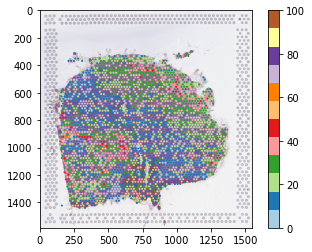

In [107]:
# checking that tissue coordinates align with wsi
sample_path = Path("/home/jupyter/Data/GBM_spatial_transcriptomics/Sample-1512")
slide_fname = "20H214_Al-Holou_GEX_Slide_Square_A.tif" 
slide_path = sample_path / "TP_Images" / slide_fname 
slide = open_slide(str(slide_path))

dims = slide.dimensions
scale_by = 10
scaled_dims = tuple(x / scale_by for x in dims)

thumb = slide.get_thumbnail(scaled_dims)
thumb_arr = np.array(thumb)

fig, ax = plt.subplots()
ax.imshow(thumb_arr)
x = df['imagecol'] / scale_by
y = df['imagerow'] / scale_by
sc = ax.scatter(x, y, s=1, c=df['label'], cmap="Paired", norm=norm)
cbar = fig.colorbar(sc)
plt.savefig(out_dir + "1512_brain1A_label.png",dpi=600)

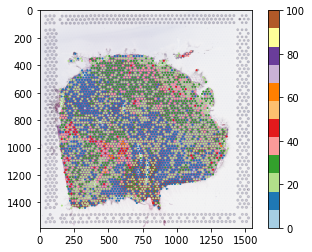

In [108]:
# checking that tissue coordinates align with wsi
sample_path = Path("/home/jupyter/Data/GBM_spatial_transcriptomics/Sample-1512")
slide_fname = "20H214_Al-Holou_GEX_Slide_Square_A.tif" 
slide_path = sample_path / "TP_Images" / slide_fname 
slide = open_slide(str(slide_path))

dims = slide.dimensions
scale_by = 10
scaled_dims = tuple(x / scale_by for x in dims)

thumb = slide.get_thumbnail(scaled_dims)
thumb_arr = np.array(thumb)

fig, ax = plt.subplots()
ax.imshow(thumb_arr)
x = df['imagecol'] / scale_by
y = df['imagerow'] / scale_by
sc = ax.scatter(x, y, s=1, c=df['prediction'], cmap="Paired",norm=norm)
cbar = fig.colorbar(sc)
plt.savefig(out_dir + "1512_brain1A_pred.png",dpi=600)

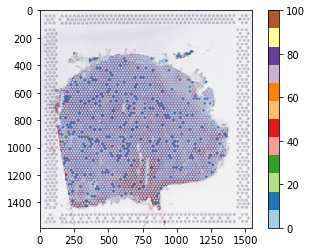

In [109]:
# checking that tissue coordinates align with wsi
sample_path = Path("/home/jupyter/Data/GBM_spatial_transcriptomics/Sample-1512")
slide_fname = "20H214_Al-Holou_GEX_Slide_Square_A.tif" 
slide_path = sample_path / "TP_Images" / slide_fname 
slide = open_slide(str(slide_path))

dims = slide.dimensions
scale_by = 10
scaled_dims = tuple(x / scale_by for x in dims)

thumb = slide.get_thumbnail(scaled_dims)
thumb_arr = np.array(thumb)

fig, ax = plt.subplots()
ax.imshow(thumb_arr)
x = df['imagecol'] / scale_by
y = df['imagerow'] / scale_by
sc = ax.scatter(x, y, s=1, c=abs(df['label']-df['prediction']),cmap="Paired",norm=norm)
cbar = fig.colorbar(sc)
plt.savefig(out_dir + "1512_brain1A_diff.png",dpi=600)